# Tracks Dataset 

In this notebook, I will be working with the **tracks.csv** dataset from the Spotify Dataset in Kaggle.
I will use K-means clustering as an unsupervised method to group the similar tracks.
I will use the Elbow method as a guide to pick an optimal value of the number of clusters.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython

import warnings
warnings.simplefilter("ignore")

sns.set_style("whitegrid")

## Analysing the dataset

In [51]:
df = pd.read_csv("tracks.csv")

In [6]:
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [8]:
nRows, nCols = df.shape
print(f'This dataset has {nRows} rows and {nCols} columns.')

This dataset has 586672 rows and 20 columns.


In [12]:
df.nunique()

id                  586601
name                446474
popularity             101
duration_ms         123120
explicit                 2
artists             114029
id_artists          115062
release_date         19698
danceability          1285
energy                2571
key                     12
loudness             29196
mode                     2
speechiness           1655
acousticness          5217
instrumentalness      5402
liveness              1782
valence               1805
tempo               122702
time_signature           5
dtype: int64

In [9]:
df.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

Since the number of missing values for the name of the tracks is relatively small compared to the number of rows in the dataset, I will drop these 71 rows.

In [52]:
df.dropna(inplace=True)

In [14]:
df.head()

,id,name,popularity,duration_in_seconds,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126.903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98.200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181.640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176.907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163.080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


It is interesting how the same song (in this example, the song "We Will Rock You") has many different values for the audio features, depending on the artists or sometimes even the performance of the song.

In [15]:
df[df.name=='We Will Rock You']

,id,name,popularity,duration_in_seconds,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
64979,22GetoSByhvjxGShdWX0Lk,We Will Rock You,49,168.750,0,['why mona'],['5C1tex8vm00yFKTitiOnMU'],1991,0.559,0.483,0,-8.016,1,0.0345,0.0146,0.000009,0.6240,0.149,128.004,4
111239,5BK5IvPzmTZBGsCnYRjSue,We Will Rock You,56,119.787,0,['Nickelback'],['6deZN1bslXzeGvOLaLMOIF'],2005,0.577,0.905,4,-5.018,0,0.1140,0.0404,0.000000,0.0685,0.288,80.980,4
297812,0a9sd6MEXZXIPHk0fAxpZ4,We Will Rock You,47,121.973,0,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],1977-10-28,0.686,0.384,11,-10.424,0,0.0719,0.6290,0.000000,0.1530,0.544,81.412,4
298398,0z4ZkIPi5VXJksMtd18seX,We Will Rock You,58,122.107,0,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],1981-10-26,0.681,0.414,11,-8.770,0,0.0835,0.5070,0.000000,0.1730,0.557,81.479,4
379437,03jhnLcIT8C4DhXnNecOZv,We Will Rock You,51,121.707,0,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],2006-06-05,0.690,0.440,11,-8.528,0,0.0768,0.6540,0.000000,0.5380,0.494,81.234,4
380937,7CJqsutkothtgiWciibrwk,We Will Rock You,1,123.867,0,['Studio Sound Group'],['0Lx4mo5amLeT3085ZPnGKC'],2014-12-02,0.728,0.472,11,-9.086,0,0.0611,0.4040,0.000000,0.0739,0.736,82.619,4
422486,4fVn54cP0hasdSHuJthQj1,We Will Rock You,55,122.093,0,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],1977-10-28,0.696,0.401,11,-10.555,0,0.0819,0.6280,0.000000,0.1730,0.537,81.259,4
521012,1Y8yaqQHBCizw26uJBuT6d,We Will Rock You,12,125.027,0,['Queen'],['1dfeR4HaWDbWqFHLkxsg1d'],1978-04-12,0.632,0.653,2,-4.979,1,0.1080,0.5070,0.000008,0.1500,0.574,81.267,4


## EDA

Attempting to get a sence of the distribution of the attributes.

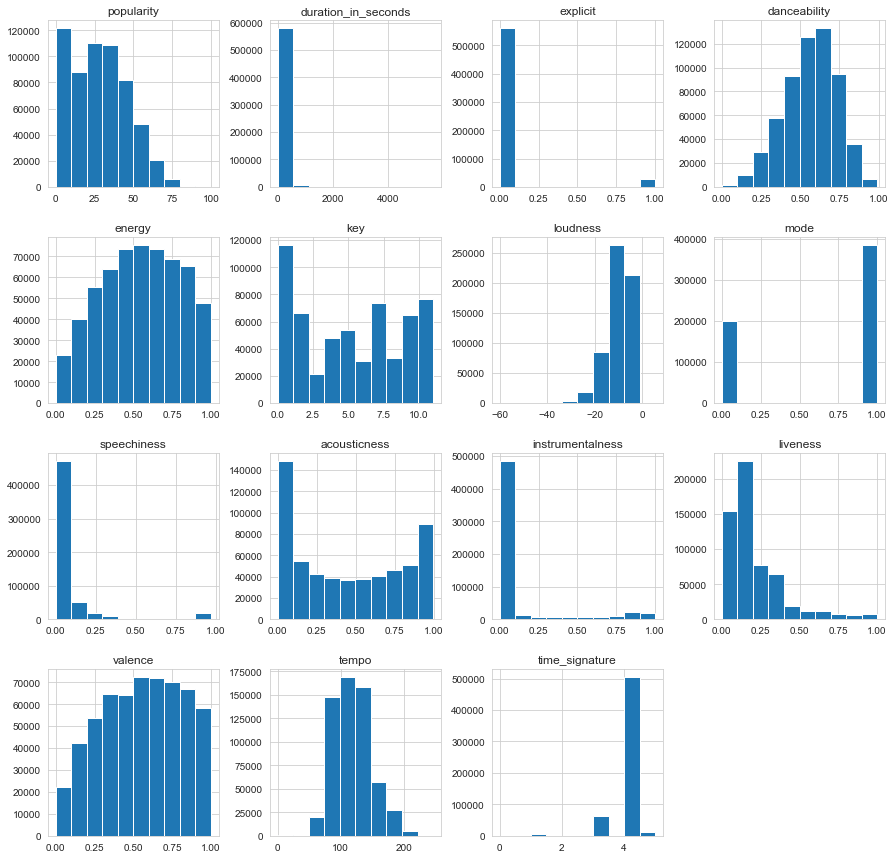

In [16]:
df.hist(figsize=(15,15))
plt.show()

From the heatmap we can conclude that the attribute "accousticness" and the attribute "energy" are negatively correlated, meaning the higher the energy, the less the accousticness, which actually makes sense.

We can also conclude that "energy" is highly correlated to "loudness", which is also very logical.

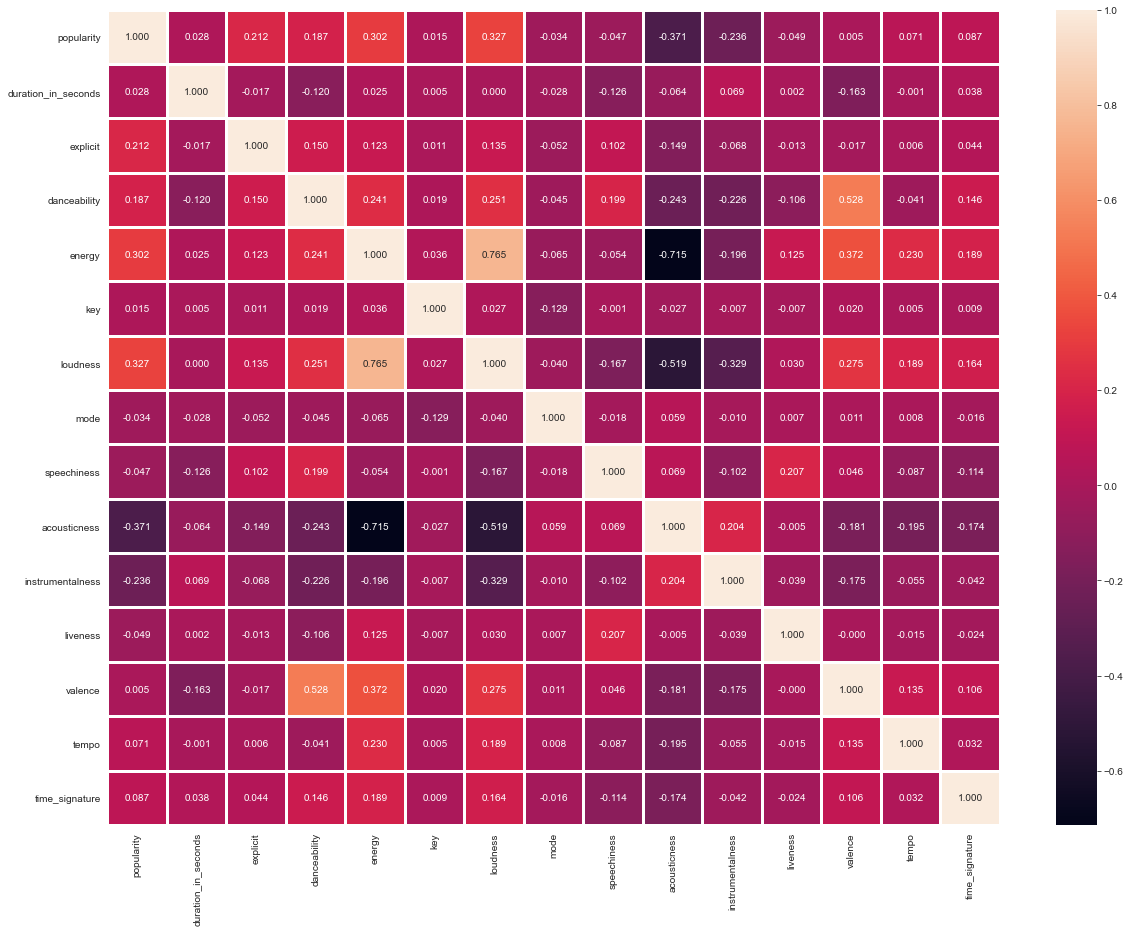

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.3f', linewidths=2)
plt.show()

Visualizing the most popular tracks.

The most popular track is "Home".

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Home'),
  Text(1, 0, 'Intro'),
  Text(2, 0, 'Stay'),
  Text(3, 0, 'Angel'),
  Text(4, 0, 'Forever'),
  Text(5, 0, 'Baby'),
  Text(6, 0, 'Heaven'),
  Text(7, 0, 'Summertime'),
  Text(8, 0, 'Runaway'),
  Text(9, 0, 'Hold On'),
  Text(10, 0, 'You'),
  Text(11, 0, 'Smile'),
  Text(12, 0, 'Hello'),
  Text(13, 0, 'Perdóname'),
  Text(14, 0, 'Rain'),
  Text(15, 0, 'Beautiful'),
  Text(16, 0, 'Without You'),
  Text(17, 0, 'Crazy'),
  Text(18, 0, 'Paradise'),
  Text(19, 0, 'Sorry')])

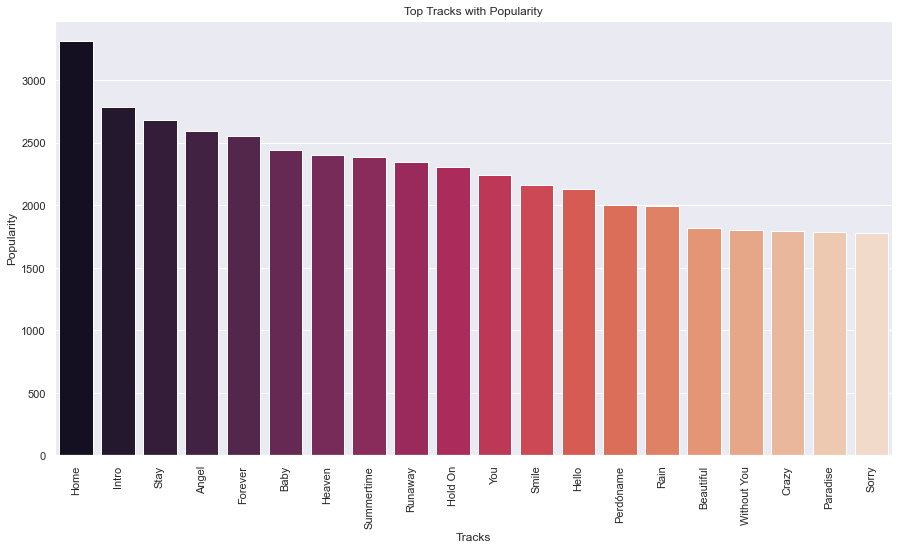

In [20]:
g_pn = df.groupby("name")['popularity'].sum().sort_values(ascending=False)[:20]
sns.set(rc={'figure.figsize':(15,8)})
axis = sns.barplot(g_pn.index, g_pn,palette='rocket')
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

Top tracks according to danceability

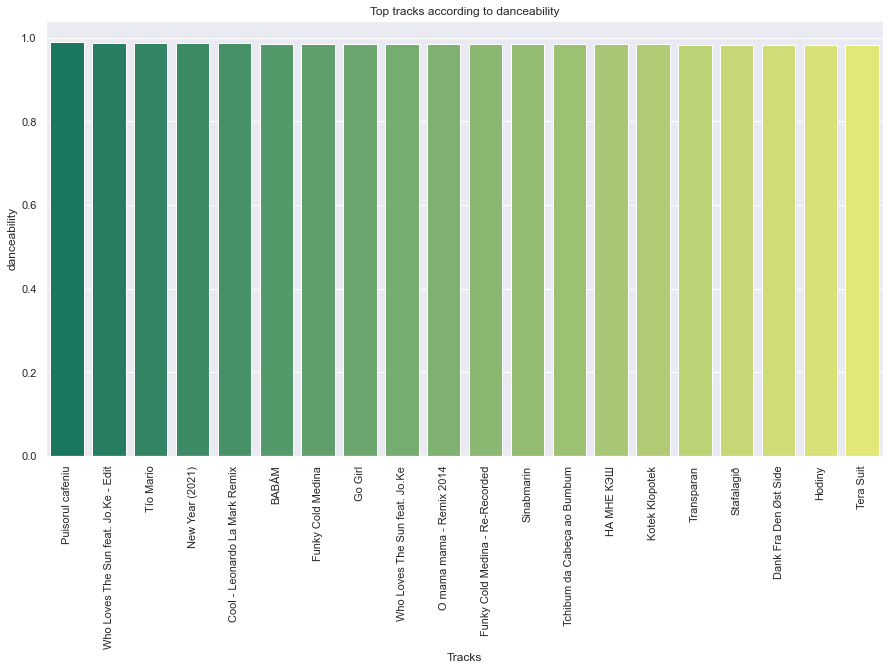

In [21]:
g_an = df.groupby('name')['danceability'].mean().sort_values(ascending=False)[:20]
axis = sns.barplot(g_an.index, g_an,palette='summer')
axis.set_title('Top tracks according to danceability')
sns.set(rc={'figure.figsize':(12,7)})
axis.set_ylabel('danceability')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)
plt.show()

Top tracks according to energy

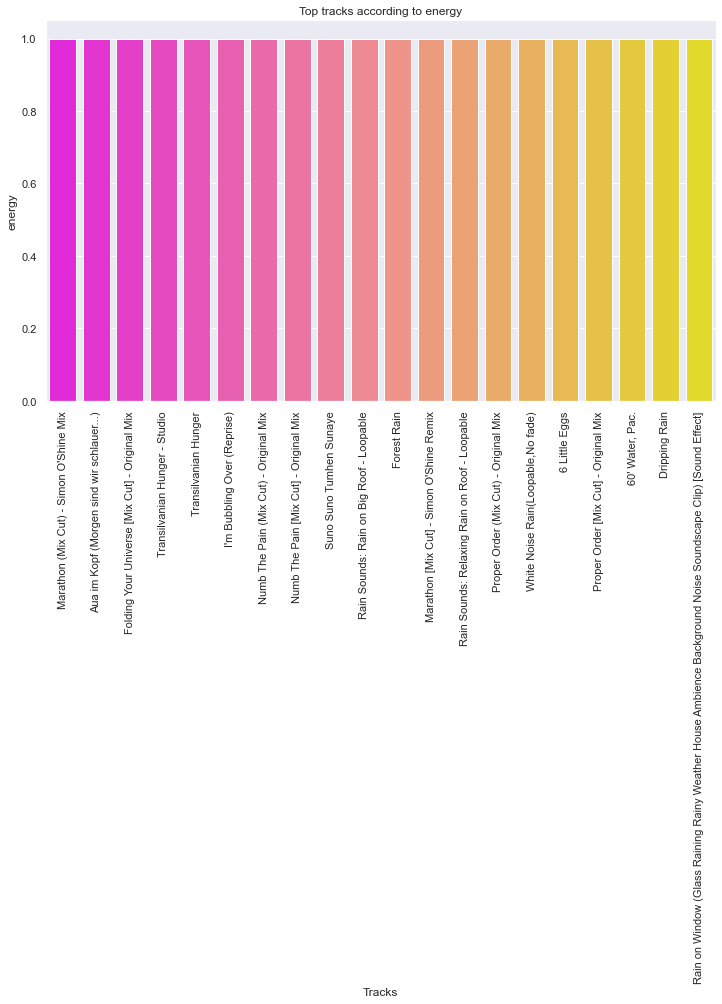

In [22]:
g_an = df.groupby('name')['energy'].mean().sort_values(ascending=False)[:20]
axis = sns.barplot(g_an.index, g_an,palette='spring')
axis.set_title('Top tracks according to energy')
sns.set(rc={'figure.figsize':(12,7)})
axis.set_ylabel('energy')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)
plt.show()

Top tracks according to liveness.

The track "99 Year Blues" has the highest liveness.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '99 Year Blues'),
  Text(1, 0, 'Intro'),
  Text(2, 0, 'Bibi und Tina Lied'),
  Text(3, 0, 'Radetzky-Marsch, Op. 228'),
  Text(4, 0, "Neujahrsgruß / New Year's Address / Allocution du Nouvel An"),
  Text(5, 0, 'Summertime'),
  Text(6, 0, 'King'),
  Text(7, 0, '2000 Years'),
  Text(8, 0, 'Bibi Blocksberg Lied'),
  Text(9, 0, 'Stay'),
  Text(10, 0, 'I Love You'),
  Text(11, 0, 'Year 3000'),
  Text(12, 0, 'An der schönen blauen Donau, Walzer, Op. 314'),
  Text(13, 0, 'Hold On'),
  Text(14, 0, 'Home'),
  Text(15, 0, 'Sorry'),
  Text(16, 0, 'Benjamin Blümchen Lied'),
  Text(17, 0, 'Runaway'),
  Text(18, 0, 'Forever'),
  Text(19, 0, 'Baby')])

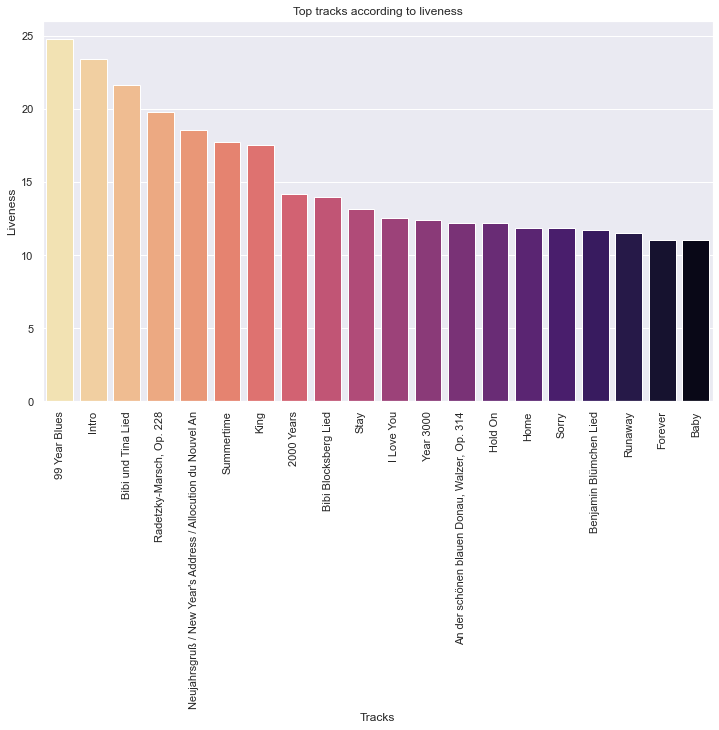

In [24]:
g_ap = df.groupby("name")['liveness'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(g_ap.index, g_ap,palette='magma_r')
sns.set(rc={'figure.figsize':(12,7)})
axis.set_title('Top tracks according to liveness')
axis.set_ylabel('Liveness')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

Top tracks according to acousticness.

The track "Summertime" has the highest acousticness.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Summertime'),
  Text(1, 0, 'Stardust'),
  Text(2, 0, 'Autumn Leaves'),
  Text(3, 0, 'Ave Maria'),
  Text(4, 0, 'The Man I Love'),
  Text(5, 0, 'Time After Time'),
  Text(6, 0, 'Intro'),
  Text(7, 0, 'My Funny Valentine'),
  Text(8, 0, 'Laura'),
  Text(9, 0, 'White Christmas'),
  Text(10, 0, 'The Way You Look Tonight'),
  Text(11, 0, 'All The Things You Are'),
  Text(12, 0, 'Overture'),
  Text(13, 0, 'Misty'),
  Text(14, 0, 'Yesterdays'),
  Text(15, 0, 'I Love You'),
  Text(16, 0, 'When Your Lover Has Gone'),
  Text(17, 0, 'Tenderly'),
  Text(18, 0, 'Blue Moon'),
  Text(19, 0, 'These Foolish Things')])

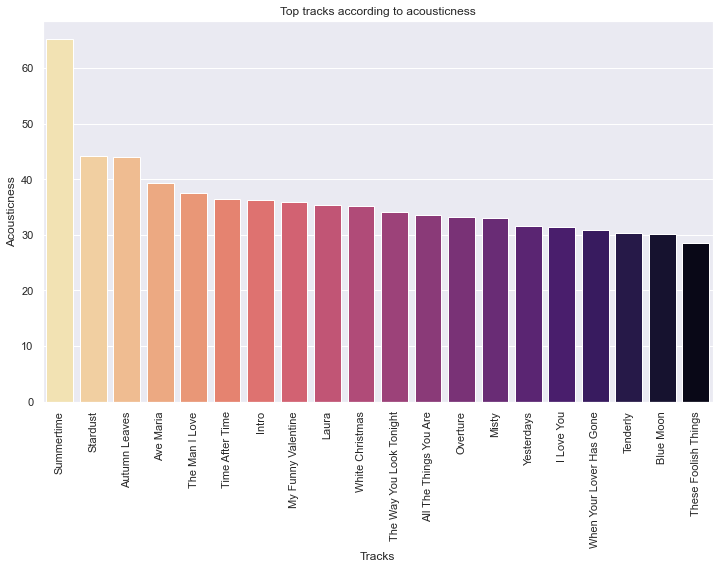

In [25]:
g_ap = df.groupby("name")['acousticness'].sum().sort_values(ascending=False)[:20]
axis = sns.barplot(g_ap.index, g_ap,palette='magma_r')
sns.set(rc={'figure.figsize':(12,7)})
axis.set_title('Top tracks according to acousticness')
axis.set_ylabel('Acousticness')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)

## Preprocessing

Converting the duration from milliseconds to seconds, since seconds are more convenient to interpret than.

In [53]:
df['duration_ms'] = df['duration_ms']/1000
df.rename({'duration_ms':'duration_in_seconds'},axis=1,inplace=True)

In [54]:
df2 = df.drop(['mode', 'id_artists', 'artists','id','name','release_date'], axis = 1) 

I am downloading the preprocessed dataset because I will need to use it later in the web application.

In [55]:
df2.to_csv('tracks_preprocessed.csv')

## 2D PCA

Reducing the dimensionality of the dataset in order to only capture the most important features.

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents1 = pca.fit_transform(df2)

Converting the obtained numpy array to  a pandas dataframe.

In [42]:
PCA_dataset1 = pd.DataFrame(data = principalComponents1, columns = ['component1', 'component2'] )
PCA_dataset1.head()

,component1,component2
0,-103.236029,-15.249514
1,-131.963387,-18.830604
2,-48.531691,9.522677
3,-53.276010,48.716232
4,-67.083051,-17.433773


In [43]:
principal_component1 = PCA_dataset1['component1']
principal_component2 = PCA_dataset1['component2']

<Figure size 864x504 with 0 Axes>

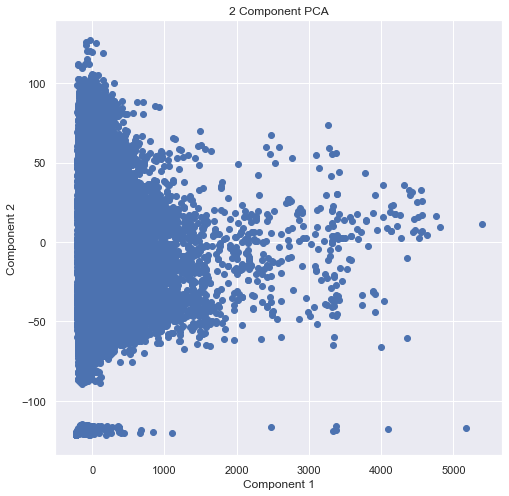

In [45]:
plt.figure()
plt.figure(figsize=(8,8))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
plt.scatter(PCA_dataset1['component1'], PCA_dataset1['component2']) 

## 3D PCA

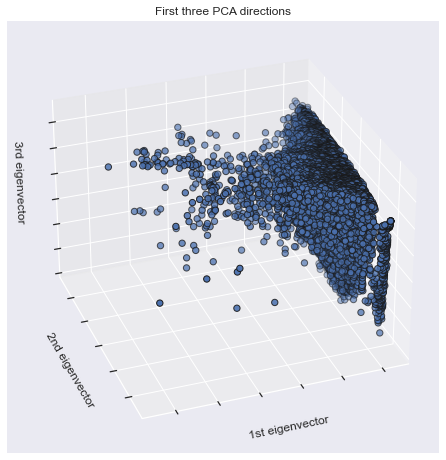

In [49]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

colors = ['navy', 'turquoise', 'darkorange']

pca = PCA(n_components=3) #We set the number of components to 3 so we can transform to a 3D space
X_reduced = pca.fit(df2).transform(df2) # Now we fit the PCA model to X with fit() and apply it to X immediately with transform() 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

## KMeans clustering

Visualizing the elbow method in order to choose the right value for K.

NOTE: Due to insufficient computational power, I could not visualize the elbow method with K > 20.
I obtained bad clustering results with K~5. I tried computing K-means clustering with K=20.

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(principalComponents1)
    inertia.append(np.sqrt(kmeans.inertia_))

Text(0, 0.5, '$J(C_k)$')

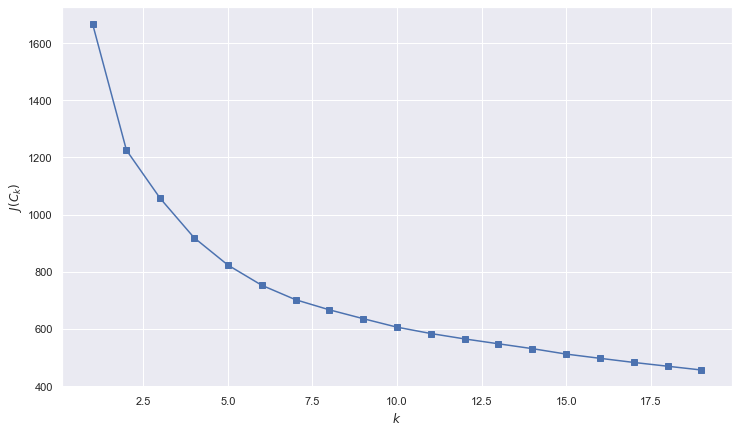

In [61]:
plt.plot(range(1, 20), inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

For K-means, I am using the projected dataset to a lower dimensional space.

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 20, init = 'k-means++', random_state = 1)
y_kmeans = kmeans.fit_predict(principalComponents1)

In [69]:
from matplotlib import colors as mcolors

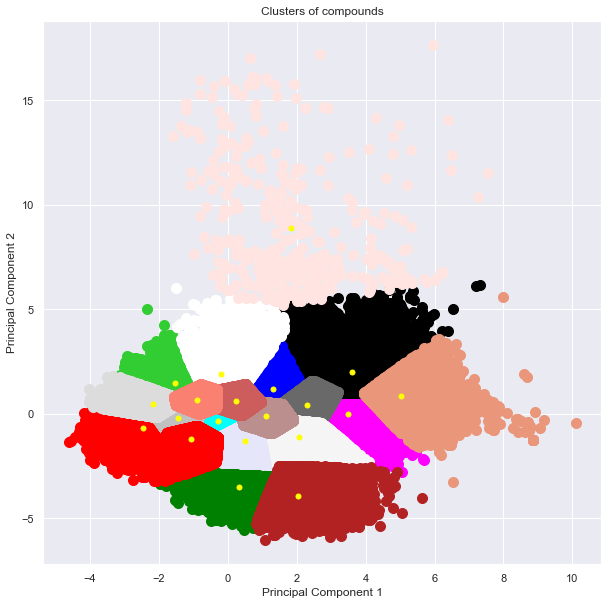

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(principalComponents1[y_kmeans == 0, 0], principalComponents1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(principalComponents1[y_kmeans == 1, 0], principalComponents1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(principalComponents1[y_kmeans == 2, 0], principalComponents1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(principalComponents1[y_kmeans == 3, 0], principalComponents1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(principalComponents1[y_kmeans == 4, 0], principalComponents1[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(principalComponents1[y_kmeans == 5, 0], principalComponents1[y_kmeans == 5, 1], s = 100, c = 'limegreen', label = 'Cluster 6')
plt.scatter(principalComponents1[y_kmeans == 6, 0], principalComponents1[y_kmeans == 6, 1], s = 100, c = 'lavender', label = 'Cluster 7')
plt.scatter(principalComponents1[y_kmeans == 7, 0], principalComponents1[y_kmeans == 7, 1], s = 100, c = 'black', label = 'Cluster 8')
plt.scatter(principalComponents1[y_kmeans == 8, 0], principalComponents1[y_kmeans == 8, 1], s = 100, c = 'dimgray', label = 'Cluster 9')
plt.scatter(principalComponents1[y_kmeans == 9, 0], principalComponents1[y_kmeans == 9, 1], s = 100, c = 'silver', label = 'Cluster 10')
plt.scatter(principalComponents1[y_kmeans == 10, 0], principalComponents1[y_kmeans == 10, 1], s = 100, c = 'gainsboro', label = 'Cluster 11')
plt.scatter(principalComponents1[y_kmeans == 11, 0], principalComponents1[y_kmeans == 11, 1], s = 100, c = 'white', label = 'Cluster 12')
plt.scatter(principalComponents1[y_kmeans == 12, 0], principalComponents1[y_kmeans == 12, 1], s = 100, c = 'whitesmoke', label = 'Cluster 13')
plt.scatter(principalComponents1[y_kmeans == 13, 0], principalComponents1[y_kmeans == 13, 1], s = 100, c = 'rosybrown', label = 'Cluster 14')
plt.scatter(principalComponents1[y_kmeans == 14, 0], principalComponents1[y_kmeans == 14, 1], s = 100, c = 'indianred', label = 'Cluster 15')
plt.scatter(principalComponents1[y_kmeans == 15, 0], principalComponents1[y_kmeans == 15, 1], s = 100, c = 'firebrick', label = 'Cluster 16')
plt.scatter(principalComponents1[y_kmeans == 16, 0], principalComponents1[y_kmeans == 16, 1], s = 100, c = 'red', label = 'Cluster 17')
plt.scatter(principalComponents1[y_kmeans == 17, 0], principalComponents1[y_kmeans == 17, 1], s = 100, c = 'mistyrose', label = 'Cluster 18')
plt.scatter(principalComponents1[y_kmeans == 18, 0], principalComponents1[y_kmeans == 18, 1], s = 100, c = 'salmon', label = 'Cluster 19')
plt.scatter(principalComponents1[y_kmeans == 19, 0], principalComponents1[y_kmeans == 19, 1], s = 100, c = 'darksalmon', label = 'Cluster 20')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 25, c = 'yellow', label = 'Centroids')
plt.title('Clusters of compounds')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
# plt.legend()
plt.show()